<a href="https://colab.research.google.com/github/srilakshmi-2003/DLT-LAB/blob/main/srilakshmi-2003/DLT-LAB/Multiclass_classification_using_Reuters_Newswire_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import reuters

In [ ]:
(train_X, train_Y), (test_X, test_Y) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from keras.utils import to_categorical

def OneHotEncoding_fn(ReutersData, dimension=10000):
    # 8982 x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
    for i, sequence in enumerate(ReutersData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)

y_train = to_categorical(train_Y)
y_test = to_categorical(test_Y)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))

#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
16/16 [==============================] - 2s 81ms/step - loss: 7.2361 - categorical_accuracy: 0.4851 - val_loss: 3.7129 - val_categorical_accuracy: 0.5688
Epoch 2/25
16/16 [==============================] - 1s 87ms/step - loss: 3.3743 - categorical_accuracy: 0.5768 - val_loss: 3.0886 - val_categorical_accuracy: 0.6087
Epoch 3/25
16/16 [==============================] - 2s 115ms/step - loss: 3.0316 - categorical_accuracy: 0.6171 - val_loss: 2.8595 - val_categorical_accuracy: 0.6187
Epoch 4/25
16/16 [==============================] - 2s 102ms/step - loss: 2.8366 - categorical_accuracy: 0.6408 - val_loss: 2.7039 - val_categorical_accuracy: 0.6725
Epoch 5/25
16/16 [==============================] - 2s 96ms/step - loss: 2.7005 - categorical_accuracy: 0.6619 - val_loss: 2.5872 - val_categorical_accuracy: 0.6775
Epoch 6/25
16/16 [==============================] - 2s 100ms/step - loss: 2.5906 - categorical_accuracy: 0.6674 - val_loss: 2.5006 - val_categorical_accuracy: 0.6800
Epoch 7

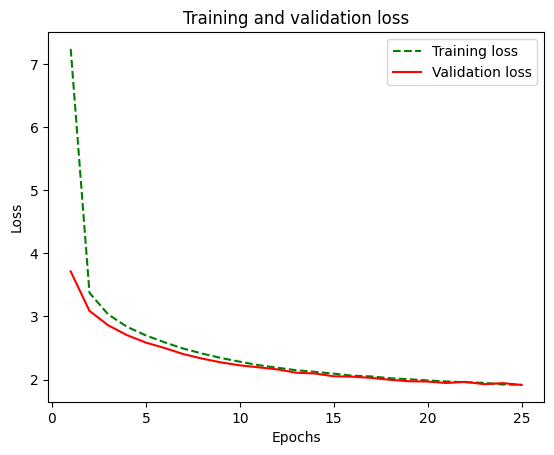

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()